<a href="https://colab.research.google.com/github/sejongsmarcle/2023_Spring_Kaggle_Study/blob/main/week5/4%ED%8C%80/spaceship_titanic_eda_27_different_models_%EC%B2%9C%EC%8A%B9%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 추가로 조사한 내용은 모두 주석에 달려 있음.
### 지금 from lightgbm import LGBMClassifier 랑 from lazypredict.Supervised import LazyClassifier가 정상적으로 동작하지 않아 뒤의 모든 코드가 오류가 나거나 어떻게든 출력해도 정상적인 출력이 안나오는 상태. - 나중에 해결책을 찾은 뒤 다시 복습하든 해야할듯.

**Created by Sanskar Hasija**

**🚀Spaceship Titanic -📊EDA + 27 different models📈**

**24 February 2022**


# <center> 🚀SPACESHIP TITANIC -📊EDA + 27 DIFFERENT MODELS📈 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading and Preperation](#3)
    - [3.1 Exploring Train Data](#3.1)
    - [3.2 Exploring Test Data](#3.2)
    - [3.3 Submission File](#3.3)
- [4. EDA](#4)
    - [4.1 Overview of Data](#4.1)
    - [4.2 Null Value Distribution](#4.7)
    - [4.3 Continuos and Categorical Data Distribution](#4.2)
    - [4.4 Feature Distribution of Continous Features](#4.3)
    - [4.5 Feature Distribution of Categorical Features](#4.4)
    - [4.6 Target Distribution ](#4.5)
    - [4.7 Correlation Matrix ](#4.6)
- [5. Data Pre-Processing](#5)    
- [6. Modeling](#6)
    - [6.1 27 Different Classifiers ( LAZY PREDICT )](#6.1)
    - [6.2 LGBM Classifier](#6.2)
- [7. Submission](#7)   

<a id="1"></a>
# **<center><span style="color:#00BFC4;">Introduction  </span></center>**

![](https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06)

**The competition is organised by `Kaggle` and is in the `GettingStarted Prediction Competition` series.**


**In this competition, you are supposed to predict predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.**

**Submissions are evaluated on `Classification Accuracy`.**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#00BFC4;">Imports  </span></center>**

### <span style="color:#e76f51;"> Installing LazyPredict : </span>

Check the offical Documentation of LazyPredict here : https://lazypredict.readthedocs.io

In [40]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

#
clear_output()

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
# 원핫인코딩할때 썼던 거(label encoder)랑 정확도 측정때 사용했던 것들(accuracy_score)? k겹 교차검증(kFold)에 test데이터 스플릿함수 import(자세힌 기억이...)

# from lightgbm import LGBMClassifier # LGBMClassifier가 지금 전체적으로 오류남.
import lazypredict
# Lazy predict - 튜닝 없이 Basic 모델을 이용했을 때, 어떤 모델을 이용하면 좋은 결과를 얻을 수 있는지 확인할 수 있다. 단, 튜닝이 없기에 맹신은 금물.

# from lazypredict.Supervised import LazyClassifier # 얘도 마찬가지로 오류남.

import time
import warnings
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#00BFC4;">Data Loading and Preparation </span></center>**

In [42]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
submission = pd.read_csv("/content/sample_submission.csv")

RANDOM_STATE = 12 
FOLDS = 5
STRATEGY = 'median'

## <span style="color:#e76f51;"> Column 설명  : </span>


- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



<a id="3.1"></a>
## <span style="color:#e76f51;"> Train Data셋 설명 : </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b><br>
 
* <i> There are total of <b><u>14</u></b> columns and <b><u>8693</u></b> rows in <b><u>train</u></b> data.</i><br>
* <i> Train data contains <b><u>119378</u></b> observation with <b><u>2324</u></b>  missing values.</i><br>
* <i> All 12 feature columns have missing values in them with <b><u>CryoSleep</u></b> having highest missing values <u>(217)</u>  </i><br>
* <i> <b><u>Transported</u></b> is the target variable which is only available in the <b><u>train</u></b> dataset.</i><br>
</div>

### <span style="color:#e76f51;"> Quick view of Train Data : </span>

Below are the first 5 rows of train dataset:

In [43]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [44]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[94mNumber of values in train data: {train.count().sum()}')
print(f'\033[94mNumber missing values in train data: {sum(train.isna().sum())}')
#format해서 출력하는 형태. 그냥 shape만 써도 충분하긴 할거 같음.

Number of rows in train data: 8693
Number of columns in train data: 14
Number of values in train data: 119378
Number missing values in train data: 2324


### <span style="color:#e76f51;"> Column Wise missing values : </span>

In [45]:
print(f'\033[94m')
print(train.isna().sum().sort_values(ascending = False))
#결측값 확인


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


### <span style="color:#e76f51;"> Basic statistics of training data : </span>

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [46]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<a id="3.2"></a>
## <span style="color:#e76f51;"> Exploring Test Data </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Test Data:</u></b><br>
 
* <i> There are total of <b><u>13</u></b> columns and <b><u>4277</u></b> rows in <b><u>test</u></b> data.</i><br>
* <i> Train data contains <b><u>54484</u></b> observation with <b><u>1117</u></b>  missing values.</i><br>
* <i> All 12 feature columns have missing values in them with <b><u>FoodCourt</u></b> having highest missing values <u>(106)</u>  </i><br>
</div>

### <span style="color:#e76f51;"> Quick view of Test Data </span>

In [47]:
test.head()
# 동일한 과정으로 진행. head, 크기 확인, 결측값 확인, describe

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [48]:
print(f'\033[94mNumber of rows in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[94mNumber of values in train data: {test.count().sum()}')
print(f'\033[94mNo of rows with missing values  in test data: {sum(test.isna().sum())}')

Number of rows in test data: 4277
Number of columns in test data: 13
Number of values in train data: 54484
No of rows with missing values  in test data: 1117


### <span style="color:#e76f51;"> Column Wise missing values </span>

In [49]:
print(f'\033[94m')
print((test.isna().sum().sort_values(ascending = False)))


FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


### <span style="color:#e76f51;"> Basic statistics of test data </span>

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [50]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


<a id="3.3"></a>
## <span style="color:#e76f51;"> Submission File </span>

### <span style="color:#e76f51;"> Quick view of Submission File </span>

In [51]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#00BFC4;"> EDA </span></center>**

<a id="4.1"></a>
## <span style="color:#e76f51;"> Overview of Data </span>

In [52]:
train.drop(["PassengerId"] , axis = 1 , inplace = True)
test.drop(["PassengerId"] , axis = 1 , inplace = True)
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col != TARGET]
RANDOM_STATE = 12 

# passenger id 제거, target은 transported 하지 못한것에 맞춤.

In [53]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')
                     # 각 변수간의 상관관계? 를 나타낸듯

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


<a id="4.7"></a>
## <span style="color:#e76f51;"> Null Value Distribution  </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i> The maximum of missing value in an row is <b><u>3</u></b> and the lowest is <b><u>no missing value</u></b></i><br>
* <i> Interestingly, the missing value distribution (row basis) is quite the same between <b><u>train</u></b> and <b><u>test</u></b> dataset. </i><br>
* <i> There are around <b><u>76%</u></b> of the observations (row basis) that has no missing values.  </i><br>
* <i> Rest <b><u>24%</u></b> of the observations (row basis) that have <b><u>1 to 3</u></b>  missing values</i><br>
</div>

<a id="4.2.1"></a>
### <span style="color:#e76f51;">Column wise Null Value Distribution   </span>

In [54]:
test_null = pd.DataFrame(test.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
# test data의 null값들을 뽑아서 값을 정렬한다.
train_null = pd.DataFrame(train.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]
# train data의 null값들을 뽑아서 값을 정렬한다.

# subplots를 활용해서 그래프 2개를 나란히 출력할수 있게 한다.
fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values")

# 각각 그래프 추가
fig.add_trace(go.Bar(x=train_null[0],
                     y=train_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)' , 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 1)

# 각각 그래프 추가
fig.add_trace(go.Bar(x=test_null[0], 
                     y=test_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)', 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 2)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution", title_x=0.5)

<a id="4.7.2"></a>
### <span style="color:#e76f51;">Row wise Null Value Distribution   </span>

In [55]:
# 앞의 과정과 동일하게 진행하되, 이번엔 column이 아닌 row값 기준으로 분포를 구한다.
missing_train_row = train.isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train.shape[0]).reset_index()
missing_test_row = test.isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test.shape[0]).reset_index()
missing_train_row.columns = ['no', 'count']
missing_test_row.columns = ['no', 'count']
missing_train_row["count"] = missing_train_row["count"]*100
missing_test_row["count"] = missing_test_row["count"]*100


fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values",)

fig.add_trace(go.Bar(x=missing_train_row["no"], 
                     y=missing_train_row["count"]  ,
                    marker=dict(color=[n for n in range(4)], 
                                line_color='rgb(0,0,0)' ,
                                line_width = 3
                                ,coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x= missing_test_row["no"], 
                     y=missing_test_row["count"],
                    marker=dict(color=[n for n in range(4)], 
                                line_color='rgb(0,0,0)',
                                line_width = 3 ,
                                coloraxis="coloraxis")),
              1, 2)
fig.update_layout(showlegend=False, title_text="Row wise Null Value Distribution", title_x=0.5)

### <span style="color:#e76f51;">Dealing with missing value (reference)  </span>
Some references on how to deal with missing value:
- [Missing Values](https://www.kaggle.com/alexisbcook/missing-values) by [Alexis Cook](https://www.kaggle.com/alexisbcook)
- [Data Cleaning Challenge: Handling missing values](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values) by [Rachael Tatman](https://www.kaggle.com/rtatman)
- [A Guide to Handling Missing values in Python ](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python) by [Parul Pandey](https://www.kaggle.com/parulpandey)

Some models that have capability to handle missing value by default are:
- XGBoost: https://xgboost.readthedocs.io/en/latest/faq.html
- LightGBM: https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html
- Catboost: https://catboost.ai/docs/concepts/algorithm-missing-values-processing.html

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
## <span style="color:#e76f51;">Continuos and Categorical Data Distribution </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i> Out of <b><u>12</u></b> features <b><u>6</u></b> features are continous, <b><u>2</u></b> features are text data and <b><u>4</u></b> features are categorical.</i><br>
* <i><b><u>HomePlanet</u></b> and <b><u>Destination</u></b> have <b><u>3</u></b> differnt unique values. </i><br>
* <i><b><u>CryoSleep</u></b> and <b><u>VIP</u></b> are <b><u>bool</u></b> features </i><br>
</div>

In [56]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)
text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

del df
print(f'\033[94mTotal number of features: {len(FEATURES)}')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')
print(f'\033[94mNumber of text features: {len(text_features)}')

labels=['Categorical', 'Continuos', "Text"]
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=2))
)])
fig.show()

 # 데이터의 종류를 구분하는 코드?

Total number of features: 12
Number of categorical features: 4
Number of continuos features: 6
Number of text features: 2


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.3"></a>
## <span style="color:#e76f51;"> Feature Distribution of Continous Features </span>


### <span style="color:#e76f51;">  Distribution of Age </span>

In [57]:
train_age = train.copy()
test_age = test.copy()
train_age["type"] = "Train"
test_age["type"] = "Test"
ageDf = pd.concat([train_age, test_age])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

# 나이의 분포를 히스토그램으로 나타내는 코드. 

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

::<a id="4.4"></a>
## <span style="color:#e76f51;">  Feature Distribution of Categorical Features - 이 이후부터는 출력은 안되거나 되더라도, 정상적인 출력이 나오지 않아 일단 나중에 해결방법을 찾고 다시 보아야 할듯/ 몰론 import문제가 아닐수도 있겠지만....
</span>

ValueError: ignored

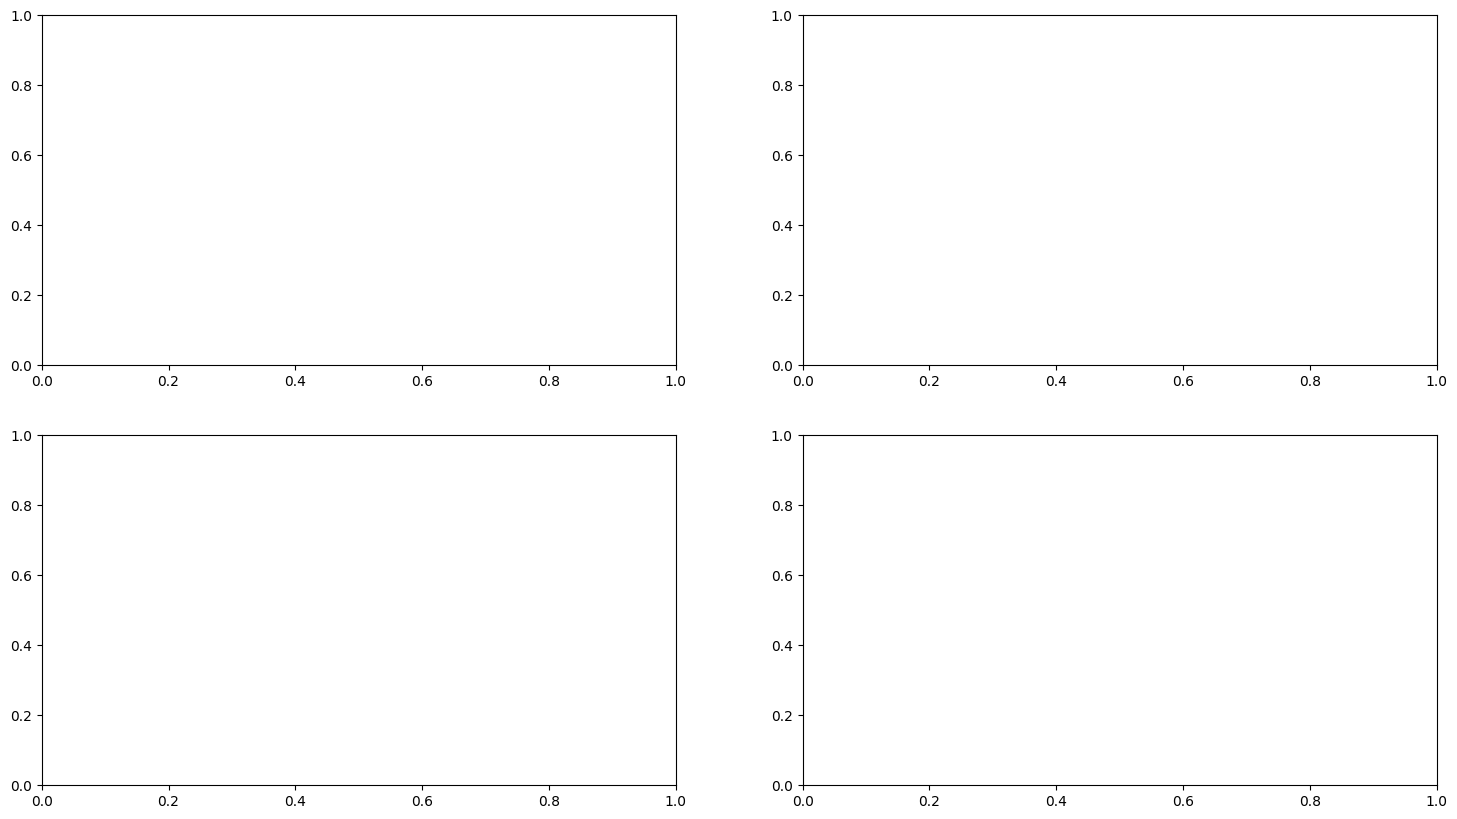

In [58]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.countplot(train[col],ax = axes[r,c] ,palette = "viridis", label='Train data')
            sns.countplot(test[col],ax = axes[r,c] ,palette = "magma", label='Test data')
            axes[r,c].legend()
            axes[r,c].set_ylabel('')
            axes[r,c].set_xlabel(col, fontsize=20)
            axes[r,c].tick_params(labelsize=10, width=0.5)
            axes[r,c].xaxis.offsetText.set_fontsize(4)
            axes[r,c].yaxis.offsetText.set_fontsize(4)
    plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.5"></a>
## <span style="color:#e76f51;">  Target Distribution </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i>There are two target values - <b><u>0</u></b> and <b><u>1</u></b>.</i><br>
* <i>Both the target values are almost equally distributed. </i><br>
</div>

In [59]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = TARGET,
             y = 'count'
            ) 
fig.update_traces(marker_color =['#58D68D','#DE3163'], 
                  marker_line_color='rgb(0,0,0)',
                  marker_line_width=2,)
fig.update_layout(title = "Target Distribution",
                  template = "plotly_white",
                  title_x = 0.5)
print("\033[94mPercentage of Transported = 0: {:.2f} %".format(target_df["count"][0] *100 / train.shape[0]))
print("\033[94mPercentage of Transported = 1: {:.2f} %".format(target_df["count"][1]* 100 / train.shape[0]))
fig.show()

Percentage of Transported = 0: 50.36 %
Percentage of Transported = 1: 49.64 %


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.6"></a>
## <span style="color:#e76f51;">  Correlation matrix </span>

In [60]:
fig = px.imshow(train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

ValueError: ignored

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<center><span style="color:#00BFC4;">Data Pre-Processing  </span></center>**

### <span style="color:#e76f51;"> Imputing Missing Values </span>

In [37]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy=STRATEGY )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)

### <span style="color:#e76f51;">Encoding Categorical Features </span>

In [38]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(train,test ,label_cols)

KeyError: ignored

In [39]:
train.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
test.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
X = train.drop(TARGET , axis =1 )
y = train[TARGET]
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                       y, 
                                                       random_state = 12 ,
                                                       test_size =0.33)

KeyError: ignored

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#00BFC4;">Modeling </span></center>**

<a id="6.1"></a>
## <span style="color:#e76f51;"> 27 Different Classifiers ( LAZY PREDICT ) : </span>

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

### <span style="color:#e76f51;">TOP 15 Models </span>

In [ ]:
models[:15]

### <span style="color:#e76f51;">Visualizing Results </span>

In [ ]:
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [ ]:
line = px.line(data_frame= models ,y =["ROC AUC" , "F1 Score"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "ROC AUC SCORE")
line.update_layout(showlegend = True,
    title = {
        'text': 'ROC AUC and F1 Score vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [ ]:
line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Time(s)")
line.update_traces(line_color="purple")
line.update_layout(showlegend = True,
    title = {
        'text': 'TIME TAKEN vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

<a id="6.2"></a>
## <span style="color:#e76f51;"> LGBM Classifier(5 FOLDS)  : </span>

In [ ]:
lgb_params = {
    'objective' : 'binary',
    'n_estimators' :50,
    'learning_rate' : 0.08
}

lgb_predictions = 0
lgb_scores = []
lgb_fimp = []
LGBM_FEATURES = list(train.columns)[:-1]
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[LGBM_FEATURES], train[TARGET])):
    print(f'\033[94m')
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][LGBM_FEATURES], train.iloc[valid_idx][LGBM_FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    lgb_scores.append(acc)
    run_time = time.time() - start_time
    
    fim = pd.DataFrame(index=LGBM_FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_fimp.append(fim)
    
    print(f"Fold={fold+1}, Accuracy score: {acc:.2f}%, Run Time: {run_time:.2f}s")
    test_preds = model.predict(test[LGBM_FEATURES]) 
    lgb_predictions += test_preds/FOLDS
print("")
print("Mean Accuracy :", np.mean(lgb_scores))

### <span style="color:#e76f51;">Feature Importance </span>

In [ ]:
lgbm_fis_df = pd.concat(lgb_fimp, axis=1).head(15)
lgbm_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="7"></a>
# **<center><span style="color:#00BFC4;">Submission </span></center>**

### <span style="color:#e76f51;">LGBM Classifier Submission : </span>

In [ ]:
submission[TARGET] = lgb_predictions.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
    
### <center>Thank you for reading🙂</center>
### <center>If you have any feedback or find anything wrong, please let me know!</center>
